In [2]:
# Done with Alexandra Nagy. 

In [20]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [21]:
# LogisticRegression gives a regression based on logical operators (yes/no)
# while linreg uses values in |N / |R etc..

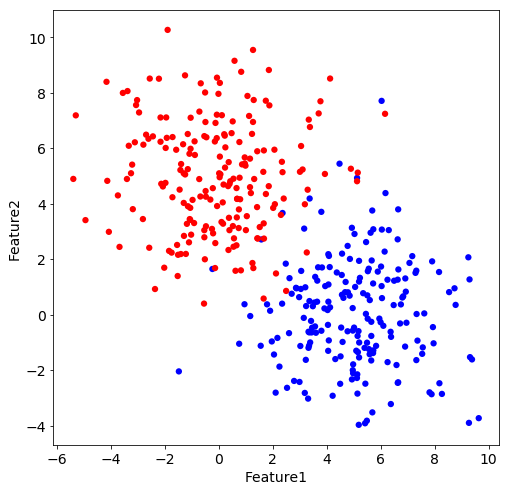

In [22]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))
plt.scatter(X[:,0], X[:,1], c=y, lw=0, s=40)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

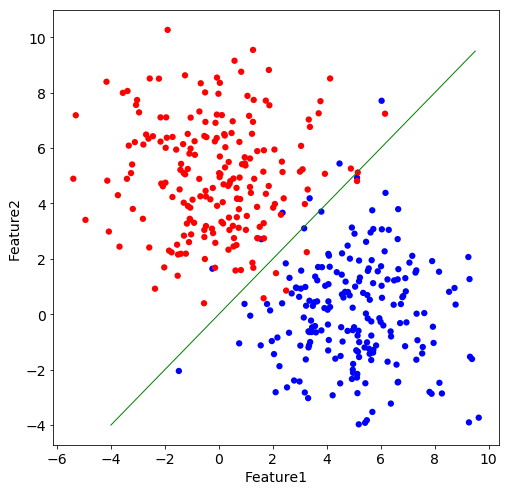

In [23]:
my_guess = np.arange(-4,10,0.5)
plt.scatter(X[:,0], X[:,1], c=y, lw=0, s=40)
plt.plot(my_guess,my_guess, c='g', lw=1)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

In [24]:
# Based on visual intuition, it looks like the best way to separate these two blobs.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
lgc = LogisticRegression()
lgc.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

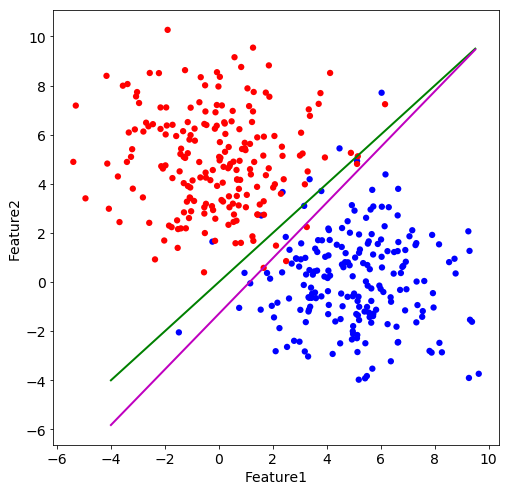

In [26]:
def f(x,a,b):
    return a+b*x

x_plt = np.arange(-4,10,0.5)
a = lgc.coef_[0][0]
b = lgc.coef_[0][1]
pred = f(x_plt,a,b)
plt.scatter(X[:,0], X[:,1], c=y, lw=0, s=40)
plt.plot(my_guess,my_guess, c='g', lw=2)
plt.plot(x_plt,pred,c='m',lw=2)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


In [ ]:
# So the predicted one is slightly different.

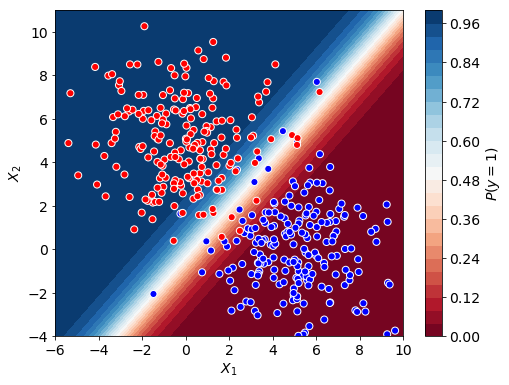

In [27]:
xx, yy = np.mgrid[-6:10:.01, -4:11:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lgc.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-6, 10), ylim=(-4, 11),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

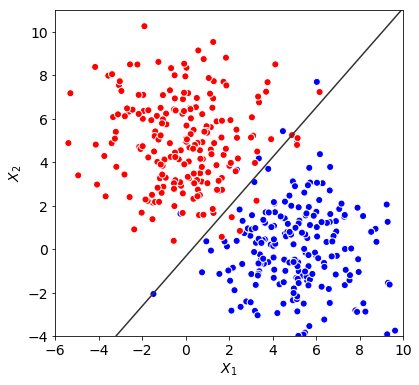

In [15]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-6, 10), ylim=(-4, 11),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [16]:
# The same can be done looping over 20 different datasets

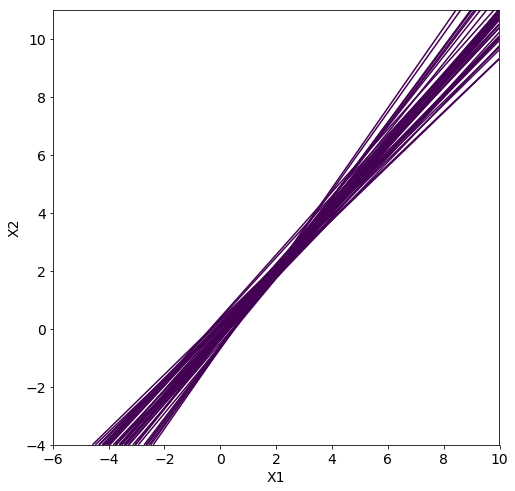

In [18]:
coeff1 = []
coeff2 = []
inter = []
models = np.arange(1,21,1)

xx, yy = np.mgrid[-6:10:.01, -4:11:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

for n in models:
    X, y = make_two_blobs(n_samples=400, cluster_std=2., random_state=42)
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.6)
    
    rgr = LogisticRegression()
    rgr.fit(X_train, y_train)
    coeff1.append(rgr.coef_[0][0])
    coeff2.append(rgr.coef_[0][1])
    inter.append(rgr.intercept_)
    
    probs = rgr.predict_proba(grid)[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, probs, levels=[.5])
    
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

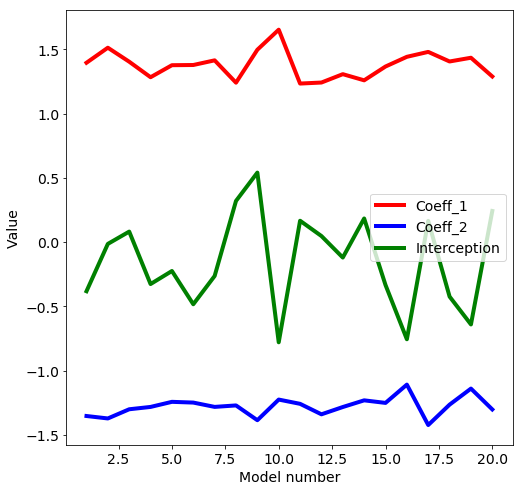

In [19]:
# With the coefficients given as follows
plt.plot(models, coeff1, label='Coeff_1', c='r', lw=4)
plt.plot(models, coeff2, label='Coeff_2', c='b', lw=4)
plt.plot(models, inter, label='Interception', c='g', lw=4)
plt.xlabel('Model number')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [ ]:
# It looks like a low variance model.